In [1]:
import numpy as np 
from scipy import optimize
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize
import os

from tqdm import * 
import pickle

import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
def func(x): 
    
    return np.sum( np.sin(x) ) + np.exp((x[0]-1) * (x[1]+2))  

In [3]:
def sample_stiefel(n,k): 
    
    A = np.random.normal( 0, 1, (n, k) ) 
    
    def normalize(v): 
        return v / np.sqrt(v.dot(v)) 

    n = A.shape[1] 

    A[:, 0] = normalize(A[:, 0])  

    for i in range(1, n): 
        Ai = A[:, i] 
        for j in range(0, i): 
            Aj = A[:, j] 
            t = Ai.dot(Aj) 
            Ai = Ai - t * Aj 
        A[:, i] = normalize(Ai) 
        
    return A 

# our method, Stiefel's sampling

In [4]:
###### 
def stiefel( x, delta, k, n = 500 ): 

    V = sample_stiefel(n,k) 

    gs = [ n/delta/2 * ( func( x + delta * V[:,i]) - func( x - delta * V[:,i]) ) * V[:,i] for i in range(k) ] 

    g = np.mean( np.array( gs ) , axis = 0 ) 
    
    return g

In [ ]:
# delta = 0.01; 
n = 500; rep = 10

xs = [np.array([0]*500), np.array([np.pi/4.]*500) ] 

deltas = [ 0.1, 0.01, 0.001 ] 

for i in range(len(xs)):
    
    x = xs[i]
    
    truth = (np.array( np.cos(x) ) + np.array( [(x[1] + 2)* np.exp( (x[0]-1)*(x[1]+2) ) 
                                                 , (x[0] - 1)* np.exp( (x[0]-1)*(x[1]+2) ) ] + [0]*(n-2) ) ) 
    
    for delta in deltas: 

        res = [] 
        
        for _ in range(rep): 
            
            res_inner = []

            for k in range(1,n+1): 

                V = sample_stiefel(n,k) 

                gs = [ n/delta/2 * ( func( x + delta * V[:,i]) - func( x - delta * V[:,i]) ) * V[:,i] for i in range(k) ] 

                g = np.mean( np.array( gs ) , axis = 0 ) 
                
                error = np.linalg.norm( g - truth )

                res_inner.append(error) 
                
            res.append(res_inner) 
            
        pickle.dump( res, 
                            open('./raw_results/for_trend_x{0}_delta{1}'.format(i,delta), 'wb' ) ) 
            

# plotting

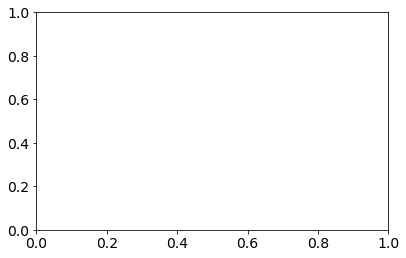

In [3]:
delta = 0.01; n = 500; rep = 10

xs = [np.array([0]*500), np.array([np.pi/4.]*500) ] 

deltas = [ 0.1, 0.01, 0.001 ] 

for i in range(len(xs)):
    
    x = xs[i]
    
    truth = (np.array( np.cos(x) ) + np.array( [(x[1] + 2)* np.exp( (x[0]-1)*(x[1]+2) ) 
                                                 , (x[0] - 1)* np.exp( (x[0]-1)*(x[1]+2) ) ] + [0]*(n-2) ) ) 
    
    for delta in deltas: 
            
        res = pickle.load( open('./raw_results/for_trend_x{0}_delta{1}'.format(i,delta), 'rb' ) ) 
            
        theory_var_curve = ( np.array([np.linalg.norm( truth )**2 *(n/k - 1) for k in range(1,n+1) ] )
                   +\
            np.array([delta**2 * np.linalg.norm( truth ) *( (n**2 - n*k) / (k**2) ) for k in range(1,n+1) ] ) \
                   +\
            delta**4 * n**2 / np.array( range(1,n+1) ) ) 
    
        
        plt.rcParams['font.size'] = 14
        
        
        error = np.mean( res, axis = 0 )
        std = 10* np.std( res, axis = 0 )

        err, = plt.plot( np.log10( np.array( error ) )[:], label = 'lg of error' ) 
        plt.fill_between( range(n), np.log10( error ) , 
                         np.log10( error + std ) , alpha = 0.4)
        
        var_bound, = plt.plot( np.log10( np.array( theory_var_curve ) )[:], linestyle = 'dashed', color = 'red', 
                              label = 'lg of var. bound' ) 
        
#         plt.ticklabel_format(axis='both', style='sci', scilimits=(4,4))

        plt.xlabel('$k$') 
        # plt.ylabel('log of error or sqrt. of variance') 

        plt.legend(handles = [err,var_bound], loc = 'lower left') 

        plt.tight_layout() 
#         plt.show() 

        plt.savefig('./figures/var_trend_x{0}_delta{1}.png'.format(i,delta), dpi = 150) 
    
        plt.cla() 

In [7]:
np.mean( res, axis = 0 )

array([2.68043369e+02, 1.71065336e+02, 1.65980414e+02, 1.47196315e+02,
       1.33065860e+02, 1.53982036e+02, 1.15111352e+02, 1.18204394e+02,
       1.07149950e+02, 1.08752348e+02, 9.39433797e+01, 9.75360033e+01,
       8.63835301e+01, 9.58489290e+01, 8.82841643e+01, 8.46121800e+01,
       8.98990120e+01, 7.81134772e+01, 7.98757633e+01, 7.77447570e+01,
       8.03358592e+01, 6.58485722e+01, 7.33803890e+01, 7.07254469e+01,
       7.54755012e+01, 6.52438293e+01, 6.83356711e+01, 6.17272421e+01,
       6.69699323e+01, 6.24314977e+01, 6.09889291e+01, 5.75215237e+01,
       5.91073529e+01, 5.76536215e+01, 5.80707823e+01, 5.70321484e+01,
       5.28949545e+01, 5.64971690e+01, 5.40689894e+01, 5.36856213e+01,
       5.23410663e+01, 5.38269424e+01, 4.99493767e+01, 5.28611476e+01,
       4.98551383e+01, 4.83130931e+01, 5.13349616e+01, 4.93793589e+01,
       4.94612255e+01, 4.57091608e+01, 4.88893977e+01, 4.73609696e+01,
       4.41689295e+01, 4.67217285e+01, 4.58787124e+01, 4.70889461e+01,
      

# below is test code

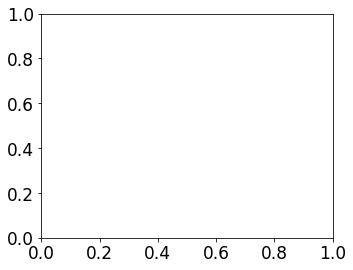

In [26]:
n = 500; 

xs = [np.array([0]*n), np.array([np.pi/4.]*n), -np.array([np.pi/2.]*n) ] 

ks = [100, 200, 300, 400 ] 

deltas = [ 0.1, 0.01, 0.001 ] 

for k in ks: 

    for delta in deltas: 

        res1 = pickle.load( open('./raw_results/stiefel_errors_x{0}_delta{1}_k{2}'.format(0,delta,k), 'rb' ) )
        res2 = pickle.load( open('./raw_results/stiefel_errors_x{0}_delta{1}_k{2}'.format(1,delta,k), 'rb' ) )
        res3 = pickle.load( open('./raw_results/stiefel_errors_x{0}_delta{1}_k{2}'.format(2,delta,k), 'rb' ) )

        plt.rcParams['font.size'] = 17 

        plt.scatter( [1]*len(res1), res1, alpha = 0.4, s = 50 )
            
        plt.scatter( [2]*len(res2), res2, alpha = 0.4, s = 50 )

        plt.scatter( [3]*len(res3), res3, alpha = 0.4, s = 50 ) 

        plt.xticks([1,2,3], ['$x = 0$', '$x = \pi/4  \cdot \mathbf{1}$', '$x = -\pi/2  \cdot \mathbf{1} $']) 

        plt.ylabel('Error') 
        
        plt.tight_layout() 
        
        plt.savefig('./figures/stiefel_only_k{0}_delta{1}.png'.format(k,delta), dpi = 150) 
        
        plt.cla() 
        